In [185]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import time

# Homework Question

# Question 1

Suppose we are given an array A of length n with the promise that there exists a majority element (i.e. an element that appears > n / 2 times). Additionally, we are only allowed to check whether two elements are equal (no > or < comparisons). Design an O(nlog(n)) algorithm to find the majority element, using divide and conquer. Informally, explain the correctness and runtime of your algorithm

In [186]:
def Count(A,LR):
    count = 0;
    for i in range(len(A)):
        if A[i] == LR:
           count+=1;
    return count;

def majorityElement(A):
    n = len(A)
    if n < 1:
        return "No majority element."
    if n == 1:
        return A[0]
    L = majorityElement(A[:round(n/2)])
    R = majorityElement(A[round(n/2):n])
    if L == R:
      return L;
    else:
      lcount = Count(A,L)
      rcount = Count(A,R)
      if lcount > rcount and lcount > n/2:
         return L;
      elif rcount > lcount and rcount > n/2: 
         return R;
      else :
         return "No majority element."

In [187]:
A = [1,3,3,8,9,2,2,3,3,3,3,3,3]
B = majorityElement(A)
print(B)

3


# Desciption and Runtime:

This algorithms works on divide and conquer technique. It divides the array into two halves and counts how many times element present in array. If it is greater than n/2, it will be the majority element.

Recurrence relation :   2T(n/2) + 2n


By Master theorem :   a = 2  ,  b=2 , d =1   ---> b^d = 2^1 = 2  --->  a = b^d ---> T(n) = O(n^dlogn)


T(n) = O(nlogn)

# Question 2 :

Given two arrays of length n, find the median of all elements of the two arrays.
(b) If the arrays are sorted, can you do better?

In [1]:
def MEDIAN_of_two_sorted(X, Y):
    n = len(X)
    if n == 1 :
        return (X[0] + Y[0]) / 2;
    m = median_index(n)
    i = m+1
    if X[m] < Y[m] :
        return MEDIAN_of_two_sorted(X[-i:], Y[:i])
    else:
        return MEDIAN_of_two_sorted(X[:i], Y[-i:])
def median_index(n)  :
    if n%2 :
        return n // 2;
    else: 
        return n//2 -1
  

In [2]:
X = [1, 2, 3, 6]
Y = [4, 6, 8, 10]
print(MEDIAN_of_two_sorted(X,Y))

5.0


# Description and Running time:

If both arrays have one element, their median is equal to their average. If there are more than one element ,this algorithm works by first getting the medians of both arrays and then compares them.

Recurrence relation : T(n/2) + 1

By Master Theorem : T(n) = O(logn)

(a) If the arrays are unsorted, what is the best you can do?

In [190]:
def merge(L, R):
    i = 0 # current index in the L array
    j = 0 # current index in the R array
    ret = []
    while i < len(L) and j < len(R):
        if L[i] < R[j]:
            ret.append(L[i])
            i += 1
        else:   # ties go to R.  Doesn't really matter.
            ret.append(R[j])
            j += 1
    while i < len(L):
        ret.append(L[i])
        i += 1
    while j < len(R):
        ret.append(R[j])
        j+= 1
    return ret
        
def mergeSort(A):
    n = len(A)
    if n <= 1:
        return A
    L = mergeSort(A[:round(n/2)])
    R = mergeSort(A[round(n/2):n])
    return merge(L,R)

In [191]:
def MEDIAN_of_two_unsorted(X, Y):
    X = mergeSort(X)
    Y = mergeSort(Y)
    n = len(X)
    if n == 1 :
        return (X[0] + Y[0]) / 2;
    m = median_index(n)
    i = m+1
    if X[m] < Y[m] :
        return MEDIAN_of_two_sorted(X[-i:], Y[:i])
    else:
        return MEDIAN_of_two_sorted(X[:i], Y[-i:])
def median_index(n)  :
    if n%2 :
        return n // 2;
    else: 
        return n//2 -1
  

In [192]:
X = [1,2,3,4,5]
Y = [11,12,13,14,15]
print(MEDIAN_of_two_unsorted(X,Y))


5


# Description and Running Time : 

First we sort the two arrays using merge sort and then applies the previous algorithm.

T(n) for sorting arrays : O(nlogn)

T(n) for finding median : O(logn)

As, sorting takes more time. Hence, T(n) = O(nlogn)

# Question 3

Implement QuickSort and compare it with Merge and Insertion Sort with small, large, very large and extremely large arrays.

In [193]:
## Insertion sort
def InsertionSort(Array):
    for j in range(1,len(Array)):
       key = Array[j]
       i = j-1
       while i>=0 and Array[i]>key:
           Array[i+1] = Array[i]
           i = i-1
       Array[i+1] = key
    return Array;

In [194]:
## Quick Sort

# swap A[i] with A[j]
def swap(A, i, j):
    tmp = A[i]
    A[i] = A[j]
    A[j] = tmp

# Here's one in-place Partition algorithm. This is the one in CLRS
def partition1(A, start, end, p):
    # first put the pivot at the end
    x = A[p]
    swap(A, p, end-1)
    # now do the algorithm described in CLRS (see the textbook for explanation)
    i = start - 1
    for j in range(start, end-1):
        if A[j] <= x:
            i += 1
            swap(A, i, j)
    # at this point all of the things <=i are smaller than the pivot, and > i are larger
    # so put the pivot back where it needs to go.
    swap(A, i+1, end-1)
    return i+1

        
# Finally, the quickSort algorithm.  
# In addition to A, it also takes an optional input "partition" which is which partition function to use.
def quickSort(A, partition=partition1):
    return quickSortHelper(A, 0, len(A), partition)
        
def quickSortHelper(A, start, end, partition):
    if end - start <= 1:
        return 
    # choose a random pivot:
    p = random.choice(range(start, end)) 
    # partition around the pivot:
    pivotLocation = partition( A, start, end, p ) 
    # recurse:
    quickSortHelper(A,start, pivotLocation ,partition)
    quickSortHelper(A,pivotLocation + 1, end, partition)
    return

# define two versions of quicksort, one for each partition function, so we can compare later.
def quickSort1(A):
    return quickSort(A, partition1)

In [195]:
# sanity check
A = [5,4,2,3,1,1,2,3,4,5,234]
quickSort1(A)
print(A)

[1, 1, 2, 2, 3, 3, 4, 4, 5, 5, 234]


Comparison of Insertion, Merge and Quick sort.


In [196]:
from tryItABunch import tryItABunch
nValuesInsertion, tValuesInsertion = tryItABunch( InsertionSort, startN = 50, endN = 1050, stepSize=50, numTrials=5, listMax = 10)
nValuesMerge, tValuesMerge = tryItABunch( mergeSort, startN = 50, endN = 1050, stepSize=50, numTrials=10, listMax = 10)
nValues, tValues = tryItABunch( quickSort, startN = 50, endN = 1050, stepSize=50, numTrials=5, listMax = 10)

Text(0.5, 1.0, 'All sorts of sorts')

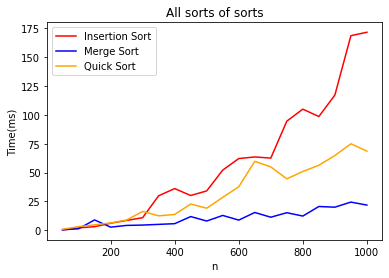

In [197]:
plt.plot(nValuesInsertion, tValuesInsertion, color="red", label="Insertion Sort")
plt.plot(nValuesMerge, tValuesMerge, color="blue", label="Merge Sort")
plt.plot(nValues, tValues, color="orange", label="Quick Sort")
plt.xlabel("n")
plt.ylabel("Time(ms)")
plt.legend()
plt.title("All sorts of sorts")


# Array of size 10

In [198]:
## Array of size 10
arr10 = [random.randint(0,100) for i in range(10)]
StrArr10 = str(arr10)
print(arr10)
with open("arr10.txt",'w',encoding = 'utf-8') as arr10:
  arr10.write(StrArr10)


[22, 33, 81, 86, 19, 57, 53, 90, 61, 67]


# Array of size 100

In [199]:
## Array of size 100
arr100 = [random.randint(0,1000) for i in range(100)]
StrArr100 = str(arr100)
print(arr100)
with open("arr100.txt",'w',encoding = 'utf-8') as arr100:
  arr100.write(StrArr100)

[61, 80, 578, 361, 91, 530, 500, 183, 540, 22, 858, 226, 969, 818, 330, 13, 822, 301, 709, 195, 755, 89, 828, 164, 299, 132, 13, 872, 170, 516, 25, 686, 147, 299, 337, 1000, 174, 452, 166, 600, 151, 436, 16, 73, 379, 273, 176, 873, 335, 6, 751, 267, 620, 351, 492, 143, 322, 871, 354, 18, 841, 810, 799, 267, 756, 376, 710, 705, 285, 118, 426, 561, 507, 707, 233, 359, 263, 777, 743, 418, 365, 721, 476, 227, 239, 595, 601, 212, 941, 694, 94, 314, 167, 754, 47, 358, 323, 364, 363, 52]


# Array of size 1000

In [200]:
## Array of size 1000
arr1000 = [random.randint(0,10000) for i in range(1000)]
StrArr1000 = str(arr1000)
print(arr1000)
with open("arr1000.txt",'w',encoding = 'utf-8') as arr1000:
  arr1000.write(StrArr1000)

[7509, 4169, 2551, 187, 3371, 768, 2802, 1078, 3061, 6623, 2763, 994, 2320, 5690, 6024, 5170, 143, 5699, 6712, 3491, 2568, 3366, 9012, 9378, 8048, 3416, 4172, 5028, 582, 9696, 4546, 6897, 1086, 9086, 5057, 9186, 7393, 7394, 3864, 625, 859, 7692, 5497, 6137, 6895, 3891, 322, 4391, 2440, 4053, 3218, 5963, 5856, 2263, 2210, 3717, 5594, 9916, 1621, 680, 3130, 6767, 3300, 6097, 7201, 8878, 2732, 8417, 6237, 7547, 4932, 4117, 9672, 9180, 4465, 1910, 8300, 6717, 1713, 6040, 2948, 1519, 4407, 7158, 5948, 8404, 9959, 6440, 9609, 6711, 2024, 5126, 1262, 84, 4694, 1313, 8263, 3747, 4888, 9227, 9837, 7397, 3497, 1397, 8323, 3637, 4179, 1941, 7269, 4353, 9047, 5046, 120, 7950, 3175, 3382, 56, 9930, 7309, 693, 6968, 960, 2559, 2751, 4964, 7569, 6321, 9878, 8229, 7015, 9088, 106, 6279, 3171, 3989, 7956, 380, 4130, 6424, 5259, 58, 9489, 4459, 7979, 2718, 1198, 9955, 8920, 9921, 4488, 8640, 5132, 8228, 6042, 3509, 8020, 468, 8694, 2414, 3426, 2741, 8914, 3304, 2974, 7898, 5658, 8184, 5625, 4477, 9552, 

# Array of size 10000

In [201]:
## Array of size 10000
arr10000 = [random.randint(0,100000) for i in range(10000)]
StrArr10000 = str(arr10000)
print(arr10000)
with open("arr10000.txt",'w',encoding = 'utf-8') as arr10000:
  arr10000.write(StrArr10000)

[3510, 46967, 96186, 36077, 12862, 97177, 86709, 81475, 44512, 23288, 44767, 56695, 53236, 31788, 40669, 23379, 16626, 12228, 36040, 61114, 37127, 42148, 56168, 17104, 29801, 7919, 17012, 85699, 88659, 91351, 51169, 71230, 39412, 51527, 27303, 79816, 52056, 59868, 21355, 76881, 91006, 81798, 4612, 36049, 45971, 82893, 59407, 9028, 69127, 54479, 83830, 98966, 17860, 46588, 22537, 91719, 13909, 5959, 92070, 61146, 97672, 52398, 69016, 7658, 35743, 87846, 61193, 62265, 57767, 60016, 10179, 59312, 43116, 97298, 77877, 94327, 56647, 29709, 19086, 146, 7220, 99311, 70262, 78453, 59990, 49354, 72333, 8048, 89682, 21925, 50502, 18218, 32522, 69004, 93695, 26436, 80236, 22466, 13251, 57242, 84652, 87811, 75188, 25291, 17047, 84234, 95280, 66391, 67671, 21353, 86802, 83365, 94311, 48415, 30997, 66221, 76474, 97641, 65830, 74395, 24660, 59231, 67241, 7338, 51855, 60347, 7591, 47099, 88321, 5922, 90237, 5233, 20932, 60558, 7680, 44106, 35060, 44399, 85354, 84328, 29629, 28864, 5548, 55629, 17101, 

# Array of size 100000

In [202]:
## Array of size 100000
arr100000 = [random.randint(0,1000000) for i in range(100000)]
StrArr100000 = str(arr100000)
print(arr100000)
with open("arr100000.txt",'w',encoding = 'utf-8') as arr100000:
  arr100000.write(StrArr100000)

[303955, 240551, 262900, 140236, 846509, 43606, 147594, 907926, 689533, 466716, 380998, 875451, 202027, 522496, 540686, 722948, 166167, 607570, 81357, 916054, 709204, 912869, 579818, 794235, 394305, 65973, 599646, 968171, 138880, 418089, 615965, 606114, 787333, 152368, 513851, 151006, 132087, 788455, 82064, 166560, 382430, 70924, 976061, 508217, 326490, 122566, 160324, 166919, 25021, 566285, 889009, 239367, 873968, 358870, 303360, 617152, 125861, 517981, 915116, 320240, 418534, 161588, 556536, 387033, 257289, 329496, 584040, 545704, 782247, 935249, 850664, 331781, 98659, 209123, 786124, 1172, 413844, 145760, 35113, 501949, 966532, 870125, 138622, 910128, 560788, 331078, 464037, 726956, 596493, 837041, 150575, 99778, 743790, 28299, 567357, 478145, 169616, 187451, 471567, 700181, 869151, 830995, 562451, 528142, 237477, 649334, 474681, 131319, 60304, 260626, 576092, 389541, 293807, 226780, 259146, 676642, 415132, 419847, 662622, 429907, 651498, 209577, 826044, 900756, 427370, 165231, 9852

# Time Difference for Array of size 10

In [203]:
with open("arr10.txt",'r',encoding = 'utf-8') as Arr10:
 i=Arr10.read()

#Change srting list to integer list
j = i[1:len(i)-1]
A = list(map(int,j.split(",")))
print("Array: ", A)

#################### Insertion sort ######################
t0 = time.time()
I = InsertionSort(A)
t1 = time.time()-t0
print("Insertion Sort: " , I)
print("Time for Insertion Sort: " , t1)
#################### Merge sort ##########################
t2 = time.time()
m = mergeSort(A)
t3 = time.time()-t2
print("Merge Sort: " , m)
print("Time for Merge Sort: " , t3)
#################### Quick sort ##########################
t2 = time.time()
m = quickSort(A)
t3 = time.time()-t2
print("Quick Sort: " , A)
print("Time for Quick Sort: " , t3)


Array:  [22, 33, 81, 86, 19, 57, 53, 90, 61, 67]
Insertion Sort:  [19, 22, 33, 53, 57, 61, 67, 81, 86, 90]
Time for Insertion Sort:  0.00099945068359375
Merge Sort:  [19, 22, 33, 53, 57, 61, 67, 81, 86, 90]
Time for Merge Sort:  0.012991905212402344
Quick Sort:  [19, 22, 33, 53, 57, 61, 67, 81, 86, 90]
Time for Quick Sort:  0.0


# Time Difference for Array of size 100

In [204]:
with open("arr100.txt",'r',encoding = 'utf-8') as Arr100:
 i=Arr100.read()

#Change srting list to integer list
j = i[1:len(i)-1]
A = list(map(int,j.split(",")))
#print("Array: ", A)

#################### Insertion sort ######################
t0 = time.time()
I = InsertionSort(A)
t1 = time.time()-t0
#print("Insertion Sort: " , I)
print("Time for Insertion Sort: " , t1)
#################### Merge sort ##########################
t2 = time.time()
m = mergeSort(A)
t3 = time.time()-t2
#print("Merge Sort: " , m)
print("Time for Merge Sort: " , t3)
#################### Quick sort ##########################
t2 = time.time()
m = quickSort(A)
t3 = time.time()-t2
#print("Quick Sort: " , A)
print("Time for Quick Sort: " , t3)


Time for Insertion Sort:  0.0029973983764648438
Time for Merge Sort:  0.002997875213623047
Time for Quick Sort:  0.00299835205078125


# Time Difference for Array of size 1000

In [205]:
with open("arr1000.txt",'r',encoding = 'utf-8') as Arr1000:
 i=Arr1000.read()

#Change srting list to integer list
j = i[1:len(i)-1]
A = list(map(int,j.split(",")))
#print("Array: ", A)

#################### Insertion sort ######################
t0 = time.time()
I = InsertionSort(A)
t1 = time.time()-t0
#print("Insertion Sort: " , I)
print("Time for Insertion Sort: " , t1)
#################### Merge sort ##########################
t2 = time.time()
m = mergeSort(A)
t3 = time.time()-t2
#print("Merge Sort: " , m)
print("Time for Merge Sort: " , t3)
#################### Quick sort ##########################
t2 = time.time()
m = quickSort(A)
t3 = time.time()-t2
#print("Quick Sort: " , A)
print("Time for Quick Sort: " , t3)


Time for Insertion Sort:  0.19287776947021484
Time for Merge Sort:  0.012997865676879883
Time for Quick Sort:  0.014997005462646484


# Time Difference for Array of size 10000

In [206]:
with open("arr10000.txt",'r',encoding = 'utf-8') as Arr10000:
 i=Arr10000.read()

#Change srting list to integer list
j = i[1:len(i)-1]
A = list(map(int,j.split(",")))
#print("Array: ", A)

#################### Insertion sort ######################
t0 = time.time()
I = InsertionSort(A)
t1 = time.time()-t0
#print("Insertion Sort: " , I)
print("Time for Insertion Sort: " , t1)
#################### Merge sort ##########################
t2 = time.time()
m = mergeSort(A)
t3 = time.time()-t2
#print("Merge Sort: " , m)
print("Time for Merge Sort: " , t3)
#################### Quick sort ##########################
t2 = time.time()
m = quickSort(A)
t3 = time.time()-t2
#print("Quick Sort: " , A)
print("Time for Quick Sort: " , t3)


Time for Insertion Sort:  20.550346851348877
Time for Merge Sort:  0.24490594863891602
Time for Quick Sort:  0.2878239154815674


# Time Difference for Array of size 100000

In [ ]:
with open("arr100000.txt",'r',encoding = 'utf-8') as Arr100000:
 i=Arr100000.read()

#Change srting list to integer list
j = i[1:len(i)-1]
A = list(map(int,j.split(",")))
#print("Array: ", A)

#################### Insertion sort ######################
t0 = time.time()
I = InsertionSort(A)
t1 = time.time()-t0
#print("Insertion Sort: " , I)
print("Time for Insertion Sort: " , t1)
#################### Merge sort ##########################
t2 = time.time()
m = mergeSort(A)
t3 = time.time()-t2
#print("Merge Sort: " , m)
print("Time for Merge Sort: " , t3)
#################### Quick sort ##########################
t2 = time.time()
m = quickSort(A)
t3 = time.time()-t2
#print("Quick Sort: " , A)
print("Time for Quick Sort: " , t3)
